In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# import datetime class from datetime module

from datetime import datetime

In [2]:
# load the Bank dataset 

bank_data = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\CaseStudy\Bank_Data_Py.csv", header=0)

# Copy the bank data to back-up file

bank_data_bk = bank_data.copy()

# display first 5 records

bank_data.head()

,Account_Num,Region,Sincome,Education,Dependents,Abalance,AB>$1000,Checkb,Aloan,Hloan,Dpayment,Ploan,SalAcc,CreditCard
0,X505769783531,3,0,3,0,324.50,0,0,1,0,0,1,0,0
1,M545200231306,4,0,6,1,1324.75,9,0,0,0,0,1,0,1
2,N580752851900,4,0,1,2,891.42,3,0,0,0,0,1,0,0
3,U227398651926,1,0,1,0,907.25,4,0,0,0,0,0,0,0
4,S246589134072,1,1,3,3,1255.83,8,0,1,0,0,0,0,0


In [3]:
# Dataset information 

bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30246 entries, 0 to 30245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Account_Num  30246 non-null  object 
 1   Region       30246 non-null  int64  
 2   Sincome      30246 non-null  int64  
 3   Education    30246 non-null  int64  
 4   Dependents   30246 non-null  int64  
 5   Abalance     30246 non-null  float64
 6   AB>$1000     30246 non-null  int64  
 7   Checkb       30246 non-null  int64  
 8   Aloan        30246 non-null  int64  
 9   Hloan        30246 non-null  int64  
 10  Dpayment     30246 non-null  int64  
 11  Ploan        30246 non-null  int64  
 12  SalAcc       30246 non-null  int64  
 13  CreditCard   30246 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 3.2+ MB


In [4]:
# Display the unique variables count

bank_data.nunique()

Account_Num    30246
Region             5
Sincome            2
Education          6
Dependents         7
Abalance        9246
AB>$1000          13
Checkb             2
Aloan              2
Hloan              2
Dpayment           2
Ploan              2
SalAcc             2
CreditCard         2
dtype: int64

In [5]:
# Identify the missing data 

bank_data.isnull().sum()

Account_Num    0
Region         0
Sincome        0
Education      0
Dependents     0
Abalance       0
AB>$1000       0
Checkb         0
Aloan          0
Hloan          0
Dpayment       0
Ploan          0
SalAcc         0
CreditCard     0
dtype: int64

In [6]:
# Displaying Duplicate values with in dataset

bank_data_dup = bank_data[bank_data.duplicated(keep='last')]
bank_data_dup

,Account_Num,Region,Sincome,Education,Dependents,Abalance,AB>$1000,Checkb,Aloan,Hloan,Dpayment,Ploan,SalAcc,CreditCard


In [7]:
# Remove the identified duplicate records 

#bank_data = bank_data.drop_duplicates()
#bank_data.shape

In [8]:
# Re-setting the row index

#bank_data = bank_data.reset_index(drop=True)

In [7]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (> 9 : 1, then the dataset is imbalance data)

CreditCard_count = bank_data.CreditCard.value_counts()
print('Class 0:', CreditCard_count[0])
print('Class 1:', CreditCard_count[1])
print('Proportion:', round(CreditCard_count[0] / CreditCard_count[1], 2), ': 1')
print('Total Ins records:', len(bank_data))

Class 0: 28193
Class 1: 2053
Proportion: 13.73 : 1
Total Ins records: 30246


In [10]:
# Display the values to check the junk values

for i in bank_data.columns:
    print(bank_data[i].value_counts())

X505769783531    1
W254462616416    1
K324015393219    1
R524706614830    1
S521373803218    1
                ..
Z457974807966    1
H419191000870    1
U106855387827    1
A324334825793    1
M438525339749    1
Name: Account_Num, Length: 30246, dtype: int64
3    8128
4    6901
2    6856
1    4357
5    4004
Name: Region, dtype: int64
0    26509
1     3737
Name: Sincome, dtype: int64
2    6775
3    6761
4    6441
1    5747
5    2662
6    1860
Name: Education, dtype: int64
2    6257
3    5419
1    5358
0    4821
4    4625
5    1898
6    1868
Name: Dependents, dtype: int64
332.33     19
345.42     18
325.92     17
342.00     17
357.00     17
           ..
868.67      1
1043.92     1
684.58      1
956.08      1
420.17      1
Name: Abalance, Length: 9246, dtype: int64
0     10082
6      4439
5      4025
7      3537
4      2742
8      2268
3      1351
9       944
2       419
10      326
11       65
1        46
12        2
Name: AB>$1000, dtype: int64
0    29270
1      976
Name: Checkb, dtype: i

In [8]:
# Delete the variables which not influencing target variable

del bank_data['Account_Num']

In [9]:
# Identify the independent and Target variables

IndepVar = []
for col in bank_data.columns:
    if col != 'CreditCard':
        IndepVar.append(col)

TargetVar = 'CreditCard'

x = bank_data[IndepVar]
y = bank_data[TargetVar]

In [11]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

#oversample = RandomOverSampler(sampling_strategy='minority')
oversample = RandomOverSampler(sampling_strategy=0.10)
x_over, y_over = oversample.fit_resample(x, y)
print(x_over.shape)
print(y_over.shape)

(31012, 12)
(31012,)


In [12]:
# Split the Bank data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21708, 12), (9304, 12), (21708,), (9304,))

In [13]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [14]:
# Load the result dataset

CSResults = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\CaseStudy\CSResults.csv", header=0)
CSResults.head()

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Comparing the classification models

Model Name:  LogisticRegression()
Confusion matrix : 
 [[   0  847]
 [   0 8457]]
Outcome values : 
 0 847 0 8457
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       847
           0       0.91      1.00      0.95      8457

    accuracy                           0.91      9304
   macro avg       0.45      0.50      0.48      9304
weighted avg       0.83      0.91      0.87      9304

Accuracy : 90.9 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


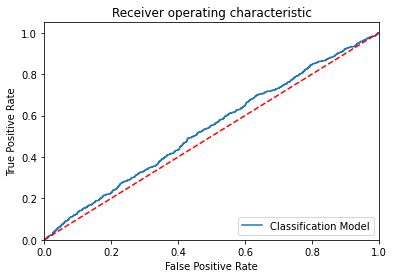

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 146  701]
 [ 754 7703]]
Outcome values : 
 146 701 754 7703
Classification report : 
               precision    recall  f1-score   support

           1       0.16      0.17      0.17       847
           0       0.92      0.91      0.91      8457

    accuracy                           0.84      9304
   macro avg       0.54      0.54      0.54      9304
weighted avg       0.85      0.84      0.85      9304

Accuracy : 84.4 %
Precision : 16.2 %
Recall : 17.2 %
F1 Score : 0.167
Specificity or True Negative Rate : 91.1 %
Balanced Accuracy : 54.2 %
MCC : 0.081
roc_auc_score: 0.542


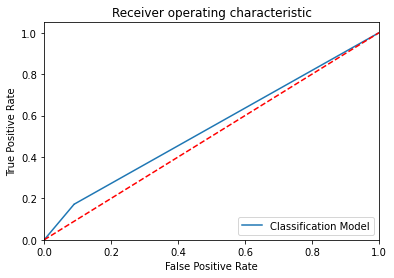

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 162  685]
 [ 129 8328]]
Outcome values : 
 162 685 129 8328
Classification report : 
               precision    recall  f1-score   support

           1       0.56      0.19      0.28       847
           0       0.92      0.98      0.95      8457

    accuracy                           0.91      9304
   macro avg       0.74      0.59      0.62      9304
weighted avg       0.89      0.91      0.89      9304

Accuracy : 91.3 %
Precision : 55.7 %
Recall : 19.1 %
F1 Score : 0.285
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 58.8 %
MCC : 0.291
roc_auc_score: 0.588


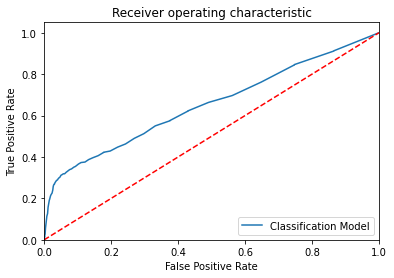

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 237  610]
 [ 262 8195]]
Outcome values : 
 237 610 262 8195
Classification report : 
               precision    recall  f1-score   support

           1       0.47      0.28      0.35       847
           0       0.93      0.97      0.95      8457

    accuracy                           0.91      9304
   macro avg       0.70      0.62      0.65      9304
weighted avg       0.89      0.91      0.90      9304

Accuracy : 90.6 %
Precision : 47.5 %
Recall : 28.0 %
F1 Score : 0.352
Specificity or True Negative Rate : 96.9 %
Balanced Accuracy : 62.4 %
MCC : 0.318
roc_auc_score: 0.624


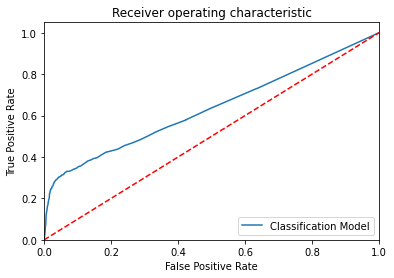

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  36  811]
 [ 142 8315]]
Outcome values : 
 36 811 142 8315
Classification report : 
               precision    recall  f1-score   support

           1       0.20      0.04      0.07       847
           0       0.91      0.98      0.95      8457

    accuracy                           0.90      9304
   macro avg       0.56      0.51      0.51      9304
weighted avg       0.85      0.90      0.87      9304

Accuracy : 89.8 %
Precision : 20.2 %
Recall : 4.3 %
F1 Score : 0.07
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 51.3 %
MCC : 0.054
roc_auc_score: 0.513


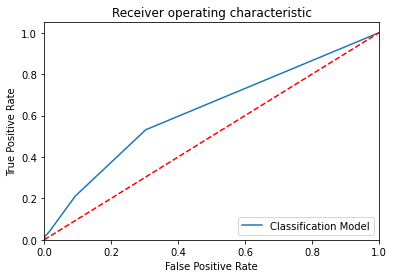

-----------------------------------------------------------------------------------------------------
Model Name:  MLPClassifier()
Confusion matrix : 
 [[   5  842]
 [  19 8438]]
Outcome values : 
 5 842 19 8438
Classification report : 
               precision    recall  f1-score   support

           1       0.21      0.01      0.01       847
           0       0.91      1.00      0.95      8457

    accuracy                           0.91      9304
   macro avg       0.56      0.50      0.48      9304
weighted avg       0.85      0.91      0.87      9304

Accuracy : 90.7 %
Precision : 20.8 %
Recall : 0.6 %
F1 Score : 0.011
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 50.2 %
MCC : 0.021
roc_auc_score: 0.502


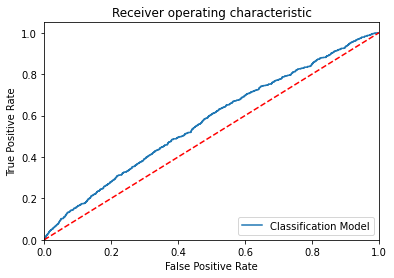

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[   0  847]
 [   0 8457]]
Outcome values : 
 0 847 0 8457
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       847
           0       0.91      1.00      0.95      8457

    accuracy                           0.91      9304
   macro avg       0.45      0.50      0.48      9304
weighted avg       0.83      0.91      0.87      9304

Accuracy : 90.9 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


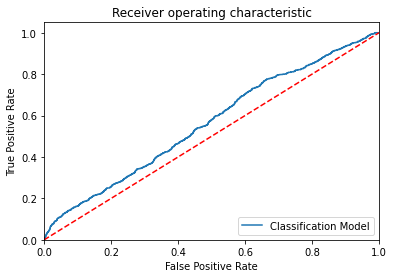

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[  52  795]
 [  60 8397]]
Outcome values : 
 52 795 60 8397
Classification report : 
               precision    recall  f1-score   support

           1       0.46      0.06      0.11       847
           0       0.91      0.99      0.95      8457

    accuracy                           0.91      9304
   macro avg       0.69      0.53      0.53      9304
weighted avg       0.87      0.91      0.87      9304

Accuracy : 90.8 %
Precision : 46.4 %
Recall : 6.1 %
F1 Score : 0.108
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 52.7 %
MCC : 0.143
roc_auc_score: 0.527


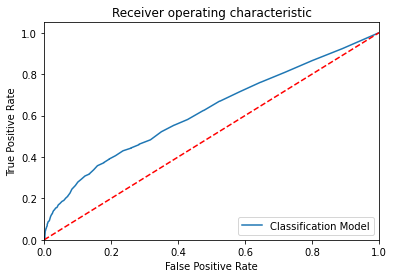

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[  12  835]
 [   8 8449]]
Outcome values : 
 12 835 8 8449
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.01      0.03       847
           0       0.91      1.00      0.95      8457

    accuracy                           0.91      9304
   macro avg       0.76      0.51      0.49      9304
weighted avg       0.88      0.91      0.87      9304

Accuracy : 90.9 %
Precision : 60.0 %
Recall : 1.4 %
F1 Score : 0.028
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 50.6 %
MCC : 0.082
roc_auc_score: 0.507


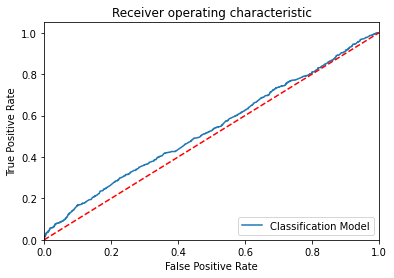

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[   0  847]
 [   0 8457]]
Outcome values : 
 0 847 0 8457
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       847
           0       0.91      1.00      0.95      8457

    accuracy                           0.91      9304
   macro avg       0.45      0.50      0.48      9304
weighted avg       0.83      0.91      0.87      9304

Accuracy : 90.9 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


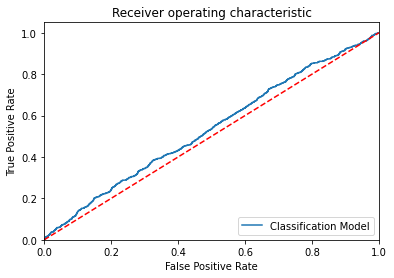

-----------------------------------------------------------------------------------------------------


In [16]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelMLP = MLPClassifier()
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None,
                                     max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelMLP, ModelSVM, modelBAG, ModelGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [18]:
# Results with comparing the all the algorithms 

CSResults.to_csv("C://Users//Admin//Downloads//Raju Sir DLS//CaseStudy//CSResults_12.csv")

CSResults.head(20)

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),0.909,NaN,0.0,0.0,1.0,NaN,0.5,0.5
1,DecisionTreeClassifier(),0.844,0.162,0.172,0.167,0.911,0.081,0.541608,0.542
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.913,0.557,0.191,0.285,0.985,0.291,0.588005,0.588
3,"(ExtraTreeClassifier(random_state=119555615), ...",0.906,0.475,0.28,0.352,0.969,0.318,0.624415,0.624
4,KNeighborsClassifier(),0.898,0.202,0.043,0.07,0.983,0.054,0.512856,0.513
5,MLPClassifier(),0.907,0.208,0.006,0.011,0.998,0.021,0.501828,0.502
6,SVC(probability=True),0.909,NaN,0.0,0.0,1.0,NaN,0.5,0.5
7,(DecisionTreeClassifier(random_state=793850313...,0.908,0.464,0.061,0.108,0.993,0.143,0.527149,0.527
8,([DecisionTreeRegressor(criterion='friedman_ms...,0.909,0.6,0.014,0.028,0.999,0.082,0.506611,0.506
9,GaussianNB(),0.909,NaN,0.0,0.0,1.0,NaN,0.5,0.5
